# Assignment 4


My name is Antonio; I'm from Mexico, and I have always been curious about mexican minimum wages compared to other countries. For this assignment I will compare salaries from Mexico and United States of America. 

My final goal is to build a visualization where I can show the difference betwen wages in these countries.

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EUA minimum wages data

In [2]:
# Reading data of EUA minimum wages
eua_df = pd.read_csv('Minimum Wage Data.csv')
eua_df.head(10)

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65000,12.26,1.65000,12.26,(b)
5,1968,Colorado,1.00000,7.43,1.15,8.55,1.15,8.55,34.8,1.00000,7.43,1.25000,9.29,(b)
6,1968,Connecticut,1.40000,10.41,1.15,8.55,1.40,10.41,34.8,1.40000,10.41,1.40000,10.41,NaN
7,1968,Delaware,1.25000,9.29,1.15,8.55,1.25,9.29,34.8,1.25000,9.29,1.25000,9.29,NaN
8,1968,District of Columbia,1.25000,9.29,1.15,8.55,1.25,9.29,34.8,1.25000,9.29,1.40000,10.41,NaN
9,1968,Florida,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,0.00000,0.00,0.00000,0.00,NaN


## Cleaning EUA data

In [3]:
# First of all, I will remove unwanted columns. Based on metadata, the column "Effective.Minimum.Wage" contains the data I need
to_drop = ['State', 'State.Minimum.Wage', 'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage', 
           'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
           'Department.Of.Labor.Cleaned.Low.Value', 'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
           'Department.Of.Labor.Cleaned.High.Value', 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote']

eua_df.drop(to_drop, axis = 'columns', inplace = True)
eua_df.rename(columns = {'Effective.Minimum.Wage': 'Salary'}, inplace = True)
eua_df.head(10)

,Year,Salary
0,1968,1.15
1,1968,2.10
2,1968,1.15
3,1968,1.15
4,1968,1.65
5,1968,1.15
6,1968,1.40
7,1968,1.25
8,1968,1.25
9,1968,1.15


In [4]:
# Now I will group the data by year. The original data contained salaries for states. I will use the mean for yearly wages
eua_df = eua_df.groupby('Year').mean()

In [5]:
eua_df.reset_index(inplace = True)
eua_df.head(10)

,Year,Salary
0,1968,1.245370
1,1969,1.245370
2,1970,1.383333
3,1971,1.383333
4,1972,1.627778
5,1973,1.627778
6,1974,1.627778
7,1975,1.627778
8,1976,2.227037
9,1977,2.227037


In [6]:
# Latter, I will explain that I have only valuable data from 1994 onwards, so let's keep only that 
eua_df = eua_df[eua_df['Year'] >= 1994]
eua_df.set_index('Year', drop = True, inplace = True)
eua_df.head(10)

,Salary
Year,
1994,4.320741
1995,4.320741
1996,4.377222
1997,4.835556
1998,5.199630
1999,5.199630
2000,5.304630
2001,5.364259
2002,5.402778


## Mexican minimum wages data

In [7]:
mx_df = pd.read_csv('Historico_salario_minimo_mexico.csv')
mx_df.head(10)

,Vigencia,Zona A,Zona B,Zona C,Zona Fronteriza
0,2020-01-01,123.22,Eliminada,Eliminada,185.56
1,2019-01-01,102.68,Eliminada,Eliminada,176.72
2,2018-01-01,88.36,Eliminada,Eliminada,NaN
3,2017-01-01,80.04,Eliminada,Eliminada,NaN
4,2016-01-01,73.04,Eliminada,Eliminada,NaN
5,2015-10-01,70.10,Eliminada,Eliminada,NaN
6,2015-04-01,70.10,68.28,Eliminada,NaN
7,2015-01-01,70.10,66.45,Eliminada,NaN
8,2014-01-01,67.29,63.77,Eliminada,NaN
9,2013-01-01,64.76,61.38,Eliminada,NaN


## Cleaning mexican data

In [8]:
# Getting the year only
mx_df['Vigencia'] = pd.to_datetime(mx_df['Vigencia'])
mx_df['Year'] = pd.DatetimeIndex(mx_df['Vigencia']).year
mx_df.drop(['Vigencia'], axis = 1, inplace = True)
mx_df.head()

,Zona A,Zona B,Zona C,Zona Fronteriza,Year
0,123.22,Eliminada,Eliminada,185.56,2020
1,102.68,Eliminada,Eliminada,176.72,2019
2,88.36,Eliminada,Eliminada,NaN,2018
3,80.04,Eliminada,Eliminada,NaN,2017
4,73.04,Eliminada,Eliminada,NaN,2016


In [9]:
# Changing values to 0 
mx_df.replace('Eliminada', 0, inplace = True)
mx_df.replace(np.nan, 0, inplace = True)
mx_df.head()

,Zona A,Zona B,Zona C,Zona Fronteriza,Year
0,123.22,0,0,185.56,2020
1,102.68,0,0,176.72,2019
2,88.36,0,0,0.00,2018
3,80.04,0,0,0.00,2017
4,73.04,0,0,0.00,2016


In [10]:
# Sum all values to get a representative amount for all the country
mx_df.set_index('Year', inplace = True)
mx_df.head()

,Zona A,Zona B,Zona C,Zona Fronteriza
Year,,,,
2020,123.22,0,0,185.56
2019,102.68,0,0,176.72
2018,88.36,0,0,0.00
2017,80.04,0,0,0.00
2016,73.04,0,0,0.00


In [11]:
# There are values that contain commas (numbers in formal 1,500.00) so I will remove them 
mx_df['Zona A'] = mx_df['Zona A'].str.replace(',', '')
mx_df['Zona B'] = mx_df['Zona B'].str.replace(',', '')
mx_df['Zona C'] = mx_df['Zona C'].str.replace(',', '')
mx_df.dtypes

Zona A              object
Zona B              object
Zona C              object
Zona Fronteriza    float64
dtype: object

In [12]:
# Now, I will convert non-numerical values to numbers
mx_df['Zona A'] = mx_df['Zona A'].astype('float64')
mx_df['Zona B'] = mx_df['Zona B'].astype('float64')
mx_df['Zona C'] = mx_df['Zona C'].astype('float64')
mx_df.dtypes

Zona A             float64
Zona B             float64
Zona C             float64
Zona Fronteriza    float64
dtype: object

In [13]:
# Finally, let's sum all values to get a representative value for every year
mx_df.replace(np.nan, 0, inplace = True)
mx_df['Salary'] = mx_df['Zona A'] + mx_df['Zona B'] + mx_df['Zona C'] + mx_df['Zona Fronteriza']
mx_df.head()

,Zona A,Zona B,Zona C,Zona Fronteriza,Salary
Year,,,,,
2020,123.22,0.0,0.0,185.56,308.78
2019,102.68,0.0,0.0,176.72,279.40
2018,88.36,0.0,0.0,0.00,88.36
2017,80.04,0.0,0.0,0.00,80.04
2016,73.04,0.0,0.0,0.00,73.04


In [14]:
to_drop = ['Zona A', 'Zona B', 'Zona C', 'Zona Fronteriza']
mx_df.drop(to_drop, axis = 1, inplace = True)
mx_df.reset_index(inplace = True)
mx_df.sort_values(by = 'Year', ascending = True, inplace = True)
mx_df.reset_index(inplace = True, drop = True)
mx_df.head()

,Year,Salary
0,1982,810.0
1,1982,1054.0
2,1983,1422.0
3,1983,1235.0
4,1984,1855.0


In [15]:
# I have only valuable data from 1994 onwards, so let's keep only that and group the values
mx_df = mx_df[mx_df['Year'] >= 1994]
mx_df = mx_df.groupby('Year').mean()
mx_df.head(10)

,Salary
Year,
1994,42.350000
1995,50.633333
1996,68.025000
1998,90.150000
2000,105.700000
2001,114.150000
2002,120.550000
2003,125.800000
2004,131.080000


In [16]:
# As you can see, there are some missing values, let's see how many of them
print("The number of observations in the EUA data is: ", len(eua_df))
print("The number of observations in the mexican data is: ", len(mx_df))

The number of observations in the EUA data is:  27
The number of observations in the mexican data is:  25


In [17]:
# The missing values are from years 1997 and 1999, let's fil them with some "representative" number
# I will add 5 for every year, just to have an offset
mx_df.loc[1997] = mx_df.loc[1996] + 5
mx_df.loc[1999] = mx_df.loc[1998] + 5
mx_df.sort_index(axis = 0, ascending = True, inplace = True)
mx_df.head()

,Salary
Year,
1994,42.350000
1995,50.633333
1996,68.025000
1997,73.025000
1998,90.150000


## Putting all the data in the same format

**To convert mexican pesos to dollars, I will upload another dataset containing the price of a single Dollar in Pesos per year. If I don't do this, then this study will not be representative, and fake conclusion could arise.** 

I have found data containing the price of a Dollar in pesos from 1994 onwards; so I will throw away past years of minumum wages, maybe this is a waste of data, but I think that having real insights is better than having lot of "bad" data.

In [18]:
# Reading the new Dataset
prices = pd.read_csv('us-dollar-mexican-peso-exchange-rate-historical-chart.csv')
prices.head()

,date,value
0,11/07/1994,3.3956
1,12/07/1994,3.3960
2,13/07/1994,3.3960
3,14/07/1994,3.3980
4,15/07/1994,3.3975


In [19]:
# Getting only the years and renaming a column
prices['date'] = pd.to_datetime(prices['date'])
prices['Year'] = pd.DatetimeIndex(prices['date']).year
prices.drop(['date'], axis = 1, inplace = True)
prices.rename(columns = {' value': 'Value'}, inplace = True)
prices.head()

,Value,Year
0,3.3956,1994
1,3.3960,1994
2,3.3960,1994
3,3.3980,1994
4,3.3975,1994


In [20]:
# Grouping the data by year's mean
prices = prices.groupby('Year').mean()
prices.head(10)

,Value
Year,
1994,3.499780
1995,6.416081
1996,7.592267
1997,7.890292
1998,9.147631
1999,9.542343
2000,9.455838
2001,9.330246
2002,9.667607


In [21]:
# Now let's check dimensions
len(prices) == len(mx_df)

False

In [22]:
# Let's check why we are not getting the answer we expect
print("The number of observations in the prices dataframe: ", len(prices))
print("The number of observations in the mexican data is: ", len(mx_df))

The number of observations in the prices dataframe:  28
The number of observations in the mexican data is:  27


In [23]:
# After insepcting the prices dataframe, you shall see that it contians an observation fro 2021, so lt's remove it
prices.drop([2021], axis = 0, inplace = True)
len(prices)

27

In [24]:
# Let's check again
len(prices) == len(mx_df)

True

In [25]:
# And a final sanity check
len(prices) == len(mx_df) == len(eua_df)

True

In [26]:
# Now, let's convert mexican pesos to american dollars using the data we have
mx_df['Salary'] = mx_df['Salary'] / prices['Value']
mx_df.head()

,Salary
Year,
1994,12.100762
1995,7.891629
1996,8.959775
1997,9.255043
1998,9.855011


## Final consideration.

We're almost there! Before ploting the data, there a final adjustment that's required. In EUA the minimum wages are per-hour, however, in Mexico, they are per-day. To solve this, I will multiply the values in the EUA dataframe by 8 (a normal work day).

In [27]:
eua_df['Salary'] = eua_df['Salary'] * 8
eua_df.head()

,Salary
Year,
1994,34.565926
1995,34.565926
1996,35.017778
1997,38.684444
1998,41.597037


<center><h1> Building visualizations 

## Mexican minimum salary per year (1994-2020) in Dollars

Before building the final visualization, I want to see the behaviour of minimum wages per country. Let's start with Mexico.

<IPython.core.display.Javascript object>


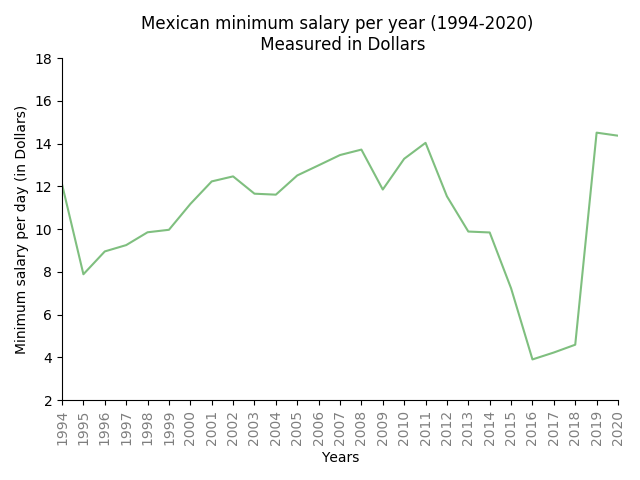

In [28]:
# Plotting the data
plt.figure()
ax = plt.subplot(111)
ax.plot(mx_df, color = 'Green', alpha = 0.5)

# Getting correct ticks
ax.set_xlim(1994, 2020)
ax.set_ylim(2, 18)
xlabels = list(mx_df.index)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation= 90, alpha = 0.5)

# Turning off some spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Labeling
ax.set_xlabel('Years')
ax.set_ylabel('Minimum salary per day (in Dollars)')
ax.set_title('Mexican minimum salary per year (1994-2020) \n Measured in Dollars')
plt.tight_layout()

Well, this is surprising, aparently the minimum salary had a huge loss between 2011 and 2016. Actually, this is jusifiable, in these years, Mexico suffer a devaluation (yes, another one), so, the descent we see in the graph is not because mexican people salaries gor reduced; it is due to the devaluation, a Dollar went from \$10 mexican pesos to $20.

So, the graph is correct.


## American minimum salary per year (1994-2020) in Dollars

Now, let's see the graph of american minimum wages

<IPython.core.display.Javascript object>


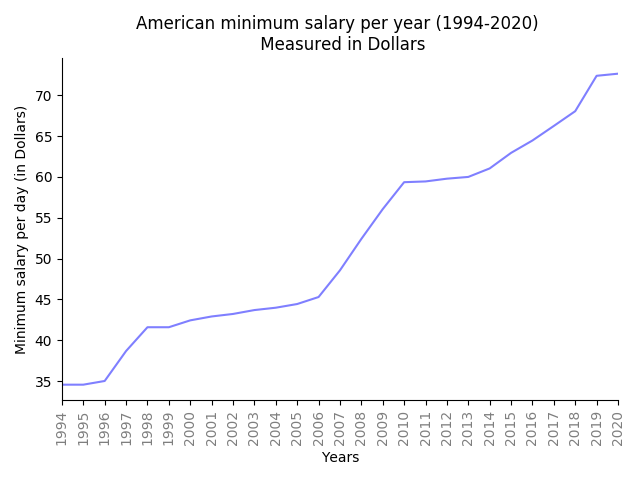

In [29]:
# Plotting the data
plt.figure()
ax = plt.subplot(111)
ax.plot(eua_df, color = 'Blue', alpha = 0.5)

# Getting correct ticks
ax.set_xlim(1994, 2020)
xlabels = list(eua_df.index)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation= 90, alpha = 0.5)

# Turning off some spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Labeling
ax.set_xlabel('Years')
ax.set_ylabel('Minimum salary per day (in Dollars)')
ax.set_title('American minimum salary per year (1994-2020) \n Measured in Dollars')
plt.tight_layout()

## Final Visualization

Now, let's compare this data in a graph

<IPython.core.display.Javascript object>


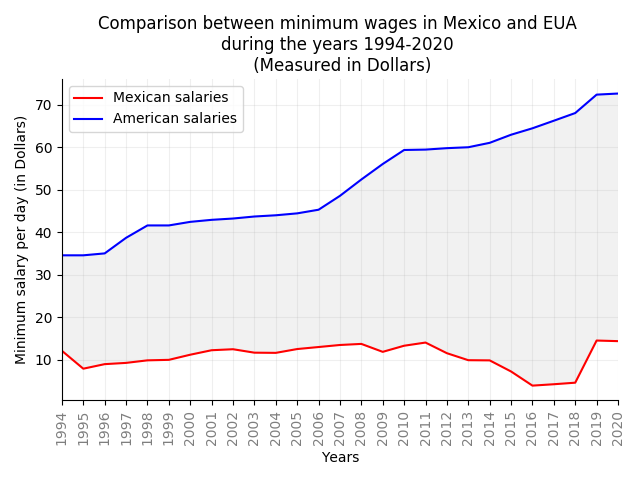

In [30]:
plt.figure()
ax = plt.subplot(111)
ax.plot(mx_df, color = 'Red', label = "Mexican salaries")
ax.plot(eua_df, color = 'Blue', label = "American salaries")
ax.fill_between(mx_df.index, mx_df['Salary'], eua_df['Salary'], facecolor = 'lightgray', alpha = 0.3)

# Getting correct ticks
ax.set_xlim(1994, 2020)
xlabels = list(eua_df.index)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation= 90, alpha = 0.5)

# Turning off some spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Labeling
ax.set_xlabel('Years')
ax.set_ylabel('Minimum salary per day (in Dollars)')
ax.set_title('Comparison between minimum wages in Mexico and EUA \nduring the years 1994-2020 \n (Measured in Dollars)')
plt.legend()
plt.grid(True, alpha = 0.2)
plt.tight_layout()

In conclusion, Mexican salaries have always been lower. The tendency does not indicate that this behaviour will change in the near future.